# Sentiment

**TODO: Add description**

In [1]:
# add all imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import time

## EDA

In [2]:
df = pd.read_csv('data/original/total.csv', sep=",", error_bad_lines=False, encoding= "unicode_escape")

C:\Users\Omer\AppData\Local\Temp\ipykernel_18044\533015749.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data/original/total.csv', sep=",", error_bad_lines=False, encoding= "unicode_escape")


In [3]:
# first insight into the data
print("Total number of entries: ", len(df["sentence id"])) # No unique since sentences with different topics may have the same ID
n_positive = df["sentiment"].value_counts()["positive"]
n_negative = df["sentiment"].value_counts()["negative"]
n_neutral = df["sentiment"].value_counts()["neutral"]
print("Total number of positive entries: ", n_positive)
print("Total number of negative entries: ", n_negative)
print("Total number of neutral entries: ", n_neutral)

Total number of entries:  656208
Total number of positive entries:  444488
Total number of negative entries:  135992
Total number of neutral entries:  75728


positive    444488
negative    135992
neutral      75728
Name: sentiment, dtype: int64


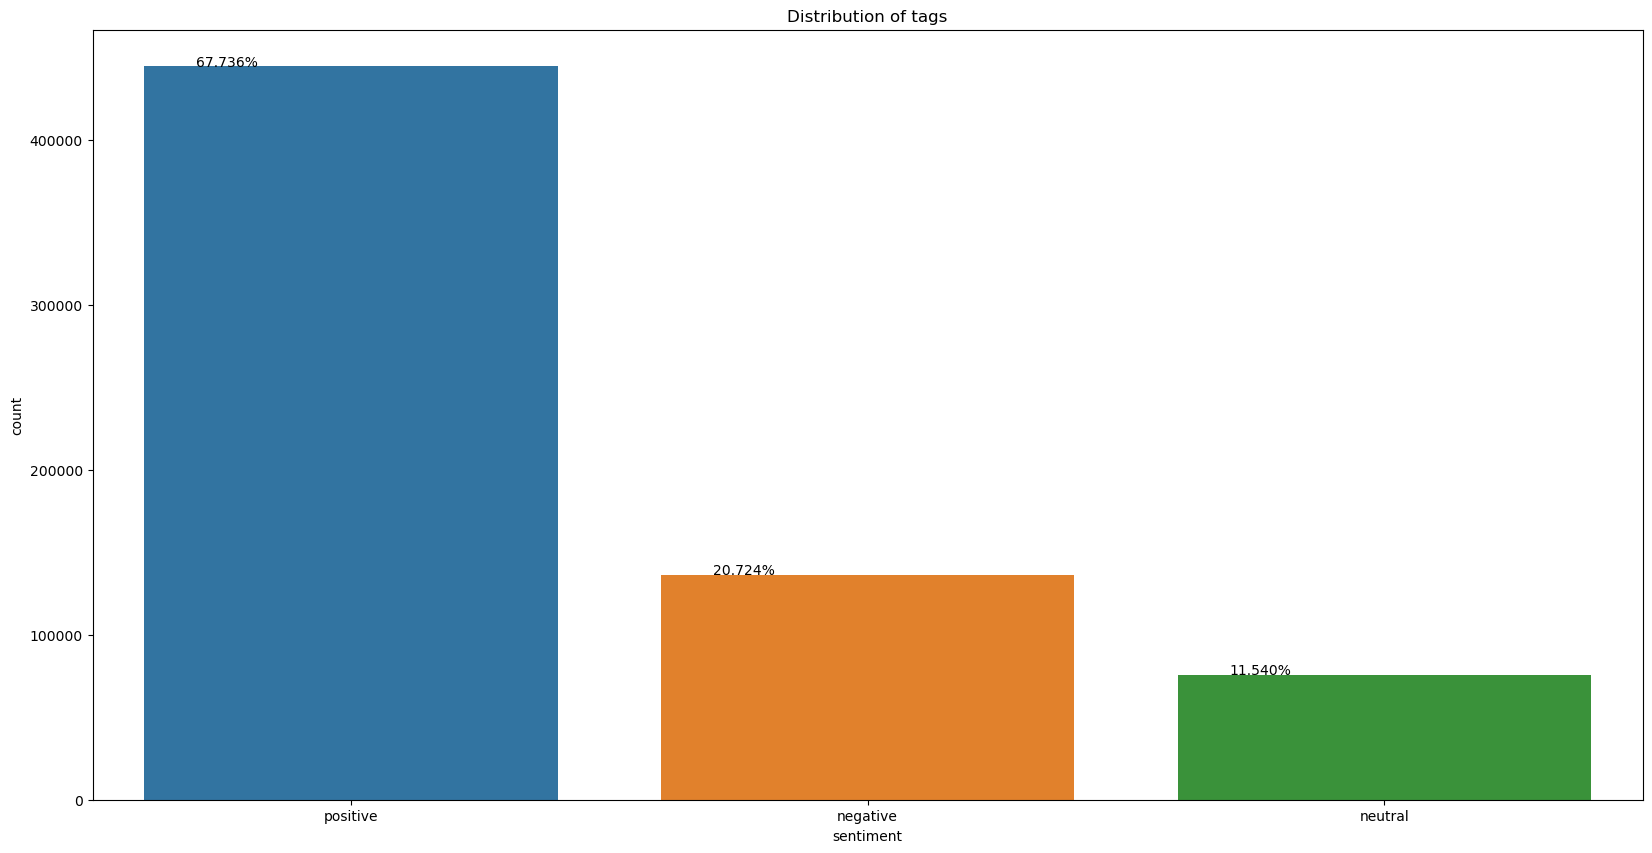

In [4]:
# more insight into the data
print(df["sentiment"].value_counts())
# plot the distribution of the tags
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="sentiment", data=df)
# add counts and percentages to the plot
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.1, p.get_height()+300))

# set the title of the plot
plt.title("Distribution of tags")
plt.savefig("figures/distribution_of_sentiments_barplot.png")
plt.show()

**Do not run the following two cells if you do not want to waste 10+ minutes**

In [5]:
start_time = time.time()
# avg. sentence count per sentiment
positive_entries = df[df["sentiment"] == "positive"]["text"][::5]
neutral_entries = df[df["sentiment"] == "neutral"]["text"][::5]
negative_entries = df[df["sentiment"] == "negative"]["text"][::5]
# [::5] to make it run in a reasonable time
positive_sentences = sent_tokenize(positive_entries.str.cat(sep=" "))
neutral_sentences = sent_tokenize(neutral_entries.str.cat(sep=" "))
negative_sentences = sent_tokenize(negative_entries.str.cat(sep=" "))
avg_sentence_per_positive = len(positive_sentences)/len(positive_entries)
print("average sentence count in positive texts: {:.3f}", avg_sentence_per_positive)
avg_sentence_per_neutral = len(neutral_sentences)/len(neutral_entries)
print("average sentence count in neutral texts: {:.3f}", avg_sentence_per_neutral)
avg_sentence_per_negative = len(negative_sentences)/len(negative_entries)
print("average sentence count in negative texts: {:.3f}", avg_sentence_per_negative)
print("---sentence %s seconds ---" % (time.time() - start_time))


average sentence count in positive texts: {:.3f} 1.2602645728812796
average sentence count in neutral texts: {:.3f} 1.3954839561600423
average sentence count in negative texts: {:.3f} 1.373028420162506
---sentence 450.102436542511 seconds ---


In [6]:
# avg. word count per sentiment
start_time = time.time()
positive_words = word_tokenize(positive_entries.str.cat(sep=" "))
neutral_words = word_tokenize(neutral_entries.str.cat(sep=" "))
negative_words = word_tokenize(negative_entries.str.cat(sep=" "))
avg_word_per_positive = len(positive_words)/len(positive_entries)
print("average word count in positive texts: {:.3f}", avg_word_per_positive)
avg_word_per_neutral = len(neutral_words)/len(neutral_entries)
print("average word count in neutral texts: {:.3f}", avg_word_per_neutral)
avg_word_per_negative = len(negative_words)/len(negative_entries)
print("average word count in negative texts: {:.3f}", avg_word_per_negative)
print("---word %s seconds ---" % (time.time() - start_time))

average word count in positive texts: {:.3f} 26.39112240995298
average word count in neutral texts: {:.3f} 28.537237554469826
average word count in negative texts: {:.3f} 27.158461708151034
---word 428.89476466178894 seconds ---


**TODO: Maybe run important_features_per_class after training**